# Lab 2-2
#### 学生信息
学号：24320172205050

姓名：博雅力

# Code

#### Initial data exploring

importing libraries:

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import os

reading from file:

In [2]:
iris_data_file = os.path.join('iris.data.txt')

In [3]:
iris_cols = {
                'Sepal.Length':     'float32',
                'Sepal.Width':      'float32',
                'Petal.Length':     'float32',
                'Petal.Width':      'float32',
                'Breed':            'category'
}

In [5]:
loaded_table = pd.read_table(iris_data_file, delimiter=",",  
                             header=None, index_col=False, 
                             names=iris_cols.keys(),
                             dtype=iris_cols,
                             keep_default_na=False, # improves speed
                             engine='python')

In [6]:
print(loaded_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float32 
 1   Sepal.Width   150 non-null    float32 
 2   Petal.Length  150 non-null    float32 
 3   Petal.Width   150 non-null    float32 
 4   Breed         150 non-null    category
dtypes: category(1), float32(4)
memory usage: 2.6 KB
None


In [7]:
print(loaded_table.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [93]:
loaded_table['Breed'].unique()

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

Breed
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

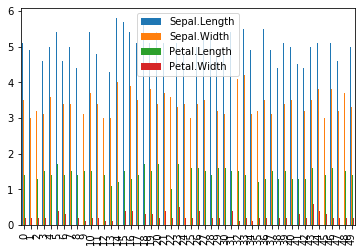

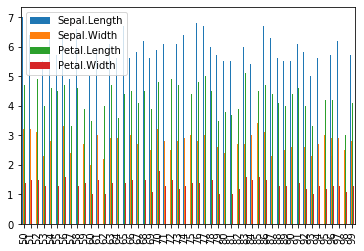

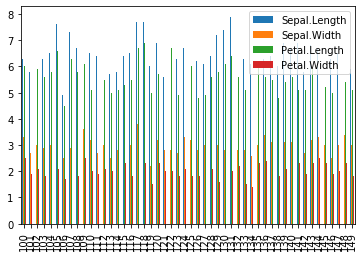

In [30]:
loaded_table.groupby('Breed').plot(kind='bar', )

## 3D Plot

In [8]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#### Ploting and saving plots

removed gif_scratch directory
created gif_scratch directory


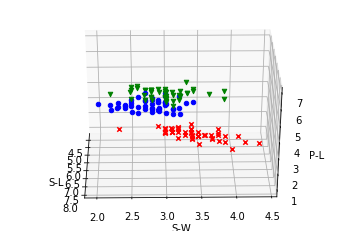

In [63]:
# initial plotting
plot3D = plt.figure().gca(projection='3d')

m_mapper = {
    'Iris-setosa': 'x',
    'Iris-versicolor': 'o',
    'Iris-virginica': 'v'
}
c_mapper = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'green'
}

plot3D.set_xlabel('S-L')
plot3D.set_ylabel('S-W')
plot3D.set_zlabel('P-L')

for idx, data in loaded_table.iterrows():
    plot3D.scatter(
                    data['Sepal.Length'], data['Sepal.Width'], data['Petal.Length'], 
                    marker=m_mapper[data['Breed']],
                    c=c_mapper[data['Breed']]
    )

# saving plots
images_path = 'gif_scratch'
    
if not os.path.isdir(images_path):
    os.makedirs(images_path)
    print('created ' + images_path + ' directory')
else:
    if not os.listdir(images_path) == []:
        shutil.rmtree(images_path)
        print('removed ' + images_path + ' directory')
        os.makedirs(images_path)
        print('created ' + images_path + ' directory')
    
for angle in range(0, 360):
    filename = os.path.join(images_path, str(angle) + '.png')
    plot3D.view_init(30, angle)
    plt.savefig(filename)
    

#### Make GIF

In [64]:
import imageio
import os
import shutil

images = []
        

for angle in range(0, 360):
    filename = os.path.join(images_path, str(angle) + '.png')
    images.append(imageio.imread(filename))
    
imageio.mimsave('4.gif', images)

#### Show gif(s):

Legend:

    Iris-setosa: red
    Iris-versicolor: blue
    Iris-virginica: green

![30deg](1.gif "S-L P-W P-L 30")
![60deg](2.gif "S-L P-W P-L 60")

![30deg](4.gif "S-L S-W P-L 30")
![60deg](3.gif "S-L S-W P-L 60")